<!-- # The given dataset contains price of second-hand Hyundai grand i10 car with respect to year of making. 
# Find the best linear relationship between year and price. 
# Can you predict the possible price of a 2022 model second-hand grand i10?
# Please learn about lasso regression and create a model along with linear regression. Find out which one is performing better. -->

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [230]:
#Read the data set
car=pd.read_csv('car_age_price.csv')
car.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [231]:
car.shape

(112, 2)

In [232]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


### Checking for null values

In [233]:
# checking whether there is any null values in dataset
car.isna().sum()

Year     0
Price    0
dtype: int64

In [234]:
#Remove duplicate entries
data = car.drop_duplicates(keep = False)
data.head()

,Year,Price
1,2019,755000
2,2019,700000
6,2016,425000
8,2017,509999
14,2017,475000


### correlation matrix

In [235]:
data.corr()

,Year,Price
Year,1.000000,0.826354
Price,0.826354,1.000000


<AxesSubplot: >

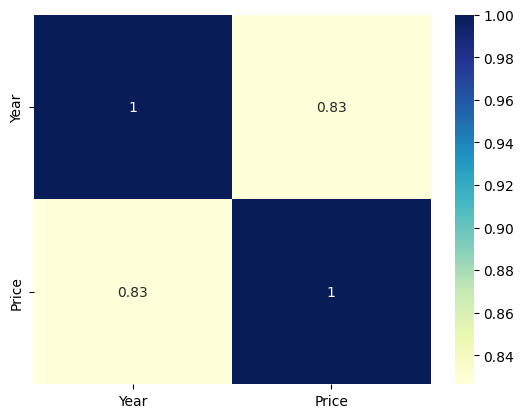

In [236]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot = True, cmap ='YlGnBu')

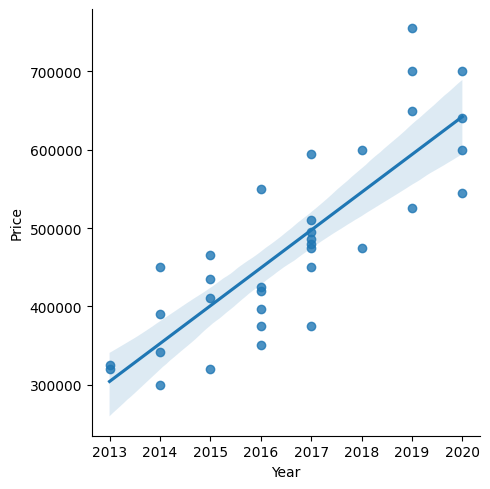

In [237]:
sns.lmplot(x ='Year', y ='Price', data = data)

In [239]:
data.describe()

,Year,Price
count,34.000000,34.000000
mean,2016.647059,480235.205882
std,2.057983,120344.995120
min,2013.000000,300000.000000
25%,2015.000000,391500.000000
50%,2017.000000,470000.000000
75%,2018.000000,548750.000000
max,2020.000000,755000.000000


In [240]:
data.Year.value_counts()

2017    8
2016    6
2019    4
2015    4
2020    4
2014    4
2018    2
2013    2
Name: Year, dtype: int64

In [241]:
data.columns

Index(['Year', 'Price'], dtype='object')

## Data Preprocessing

In [242]:
# All values are numerical so there is no need to Convert all categorical values into numerical.

### Finding outliers and removing

#### Boxplot

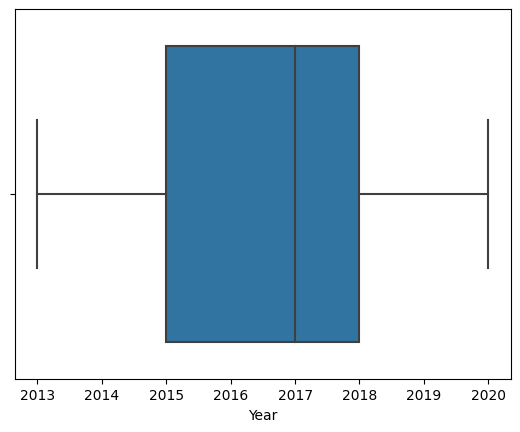

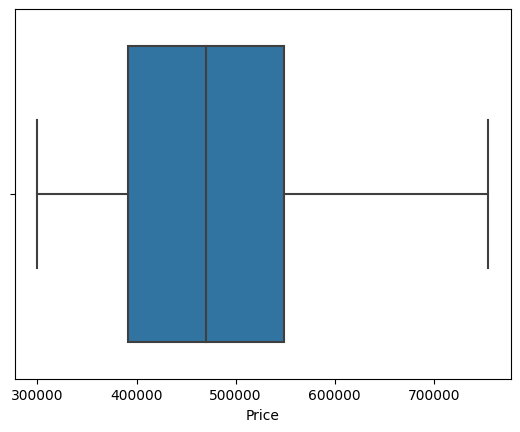

In [243]:
for i in data:
    sns.boxplot(x=data[i])
    plt.show()

In [244]:
# no outliers found

In [245]:
##Scaling

In [246]:
from sklearn.preprocessing import MinMaxScaler

In [247]:
data.head()

,Year,Price
1,2019,755000
2,2019,700000
6,2016,425000
8,2017,509999
14,2017,475000


In [248]:
df = pd.DataFrame(data)

In [249]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled

,Year,Price
0,0.857143,1.000000
1,0.857143,0.879121
2,0.428571,0.274725
3,0.571429,0.461536
4,0.571429,0.384615
5,0.285714,0.296701
6,0.857143,0.769231
7,0.571429,0.329670
8,0.571429,0.408791
9,0.714286,0.384615


C:\Users\User\AppData\Local\Temp\ipykernel_12172\450459878.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],ax=ax[0])
C:\Users\User\AppData\Local\Temp\ipykernel_12172\450459878.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_scaled[i],ax=ax[1])
C:\Users\User\AppData\Local\Temp\ip

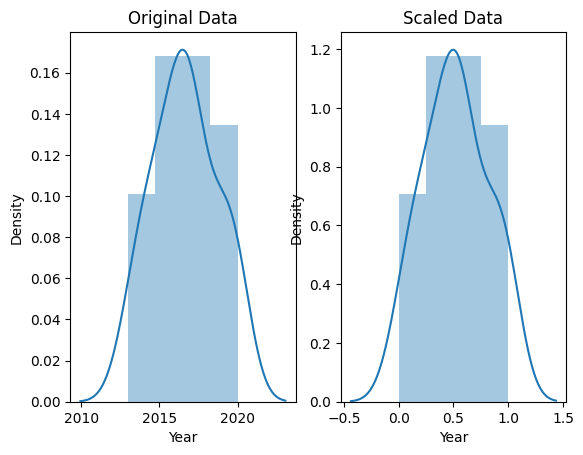

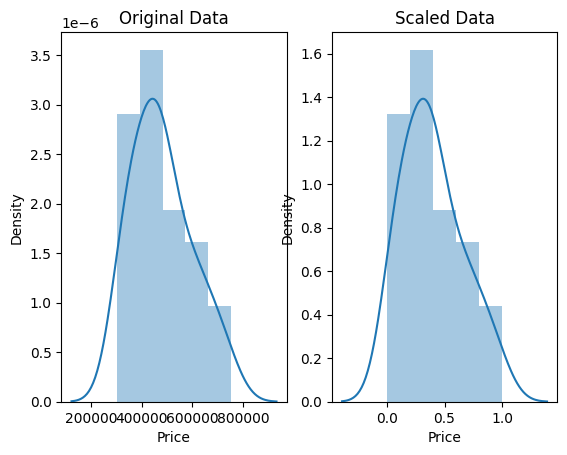

In [250]:
#plot entire dataset

for i in df:
    fig, ax =plt.subplots(1,2)
    sns.distplot(df[i],ax=ax[0])
    ax[0].set_title("Original Data")
    sns.distplot(df_scaled[i],ax=ax[1])
    ax[1].set_title("Scaled Data")

In [251]:
#Normalize

In [252]:
from sklearn import preprocessing

df = preprocessing.normalize(data)
norm_df = pd. DataFrame(df, columns=data.columns)


In [ ]:
x = data

# # model creation using Lasso Regression

# model creation using Linear Regression

In [215]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size=0.2)

In [216]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)

In [217]:
from sklearn.metrics import mean_squared_error,r2_score
print("Mean Squared Error = ", mean_squared_error(y_test,predictions))
print("R Squared value = ", r2_score(y_test,predictions))

Mean Squared Error =  3.627733538740421e-13
R Squared value =  0.9882391051682339


### STANDARD SCALING

In [224]:
from sklearn.preprocessing import StandardScaler
x =data.drop(['Price'], axis=1)
y = data['Price']
std_scaler = StandardScaler()
x2 = std_scaler.fit_transform(x)
x2 = pd.DataFrame(x2)

In [225]:
from sklearn.model_selection import train_test_split
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y,random_state = 42, test_size=0.2)

from sklearn.linear_model import LinearRegression
linear_regression1 = LinearRegression()
model2 = linear_regression1.fit(x2_train,y2_train)
predictions2 = model2.predict(x2_test)

from sklearn.metrics import mean_squared_error,r2_score
print("Mean Squared Error = ", mean_squared_error(y2_test,predictions2))
print("R Squared value = ", r2_score(y2_test,predictions2))

Mean Squared Error =  684481489.4814078
R Squared value =  0.9592901877910484


### Normalize

In [226]:
from sklearn.preprocessing import normalize
x3 = normalize(x2)
x3 = pd.DataFrame(x3)
from sklearn.model_selection import train_test_split
x3_train,x3_test,y3_train,y3_test = train_test_split(x3,y,random_state = 42, test_size=0.2)

from sklearn.linear_model import LinearRegression
linear_regression3 = LinearRegression()
model3 = linear_regression3.fit(x3_train,y3_train)
predictions3 = model3.predict(x3_test)

from sklearn.metrics import mean_squared_error,r2_score
print("Mean Squared Error = ", mean_squared_error(y3_test,predictions3))
print("R Squared value = ", r2_score(y3_test,predictions3))

Mean Squared Error =  7460566001.907689
R Squared value =  0.5562798328698985


In [227]:
# predict the possible price of a 2022 model second-hand grand i1

### Lasso Regression and linear Regression
 Lasso regression is the best choice if we have a large amount of features we need to reduce the number of features in the model in order to simplify and make it more interpretable. But Lasso is less Flexible than Linear Regression.

Linear regression (in scikit-learn) is the most basic form, where the model is not penalized for its choice of weights, at all. That means, during the training stage, if the model feels like one particular feature is particularly important, the model may place a large weight to the feature. This sometimes leads to overfitting in small datasets. Hence, following methods are invented.
Lasso is a modification of linear regression, where the model is penalized for the sum of absolute values of the weights. Thus, the absolute values of weight will be (in general) reduced, and many will tend to be zeros.